In [1]:
cd "D:\Sem 2\RP\"

D:\Sem 2\RP


# Acquisition of my ECG(From AD8232 and Arduino Uno)

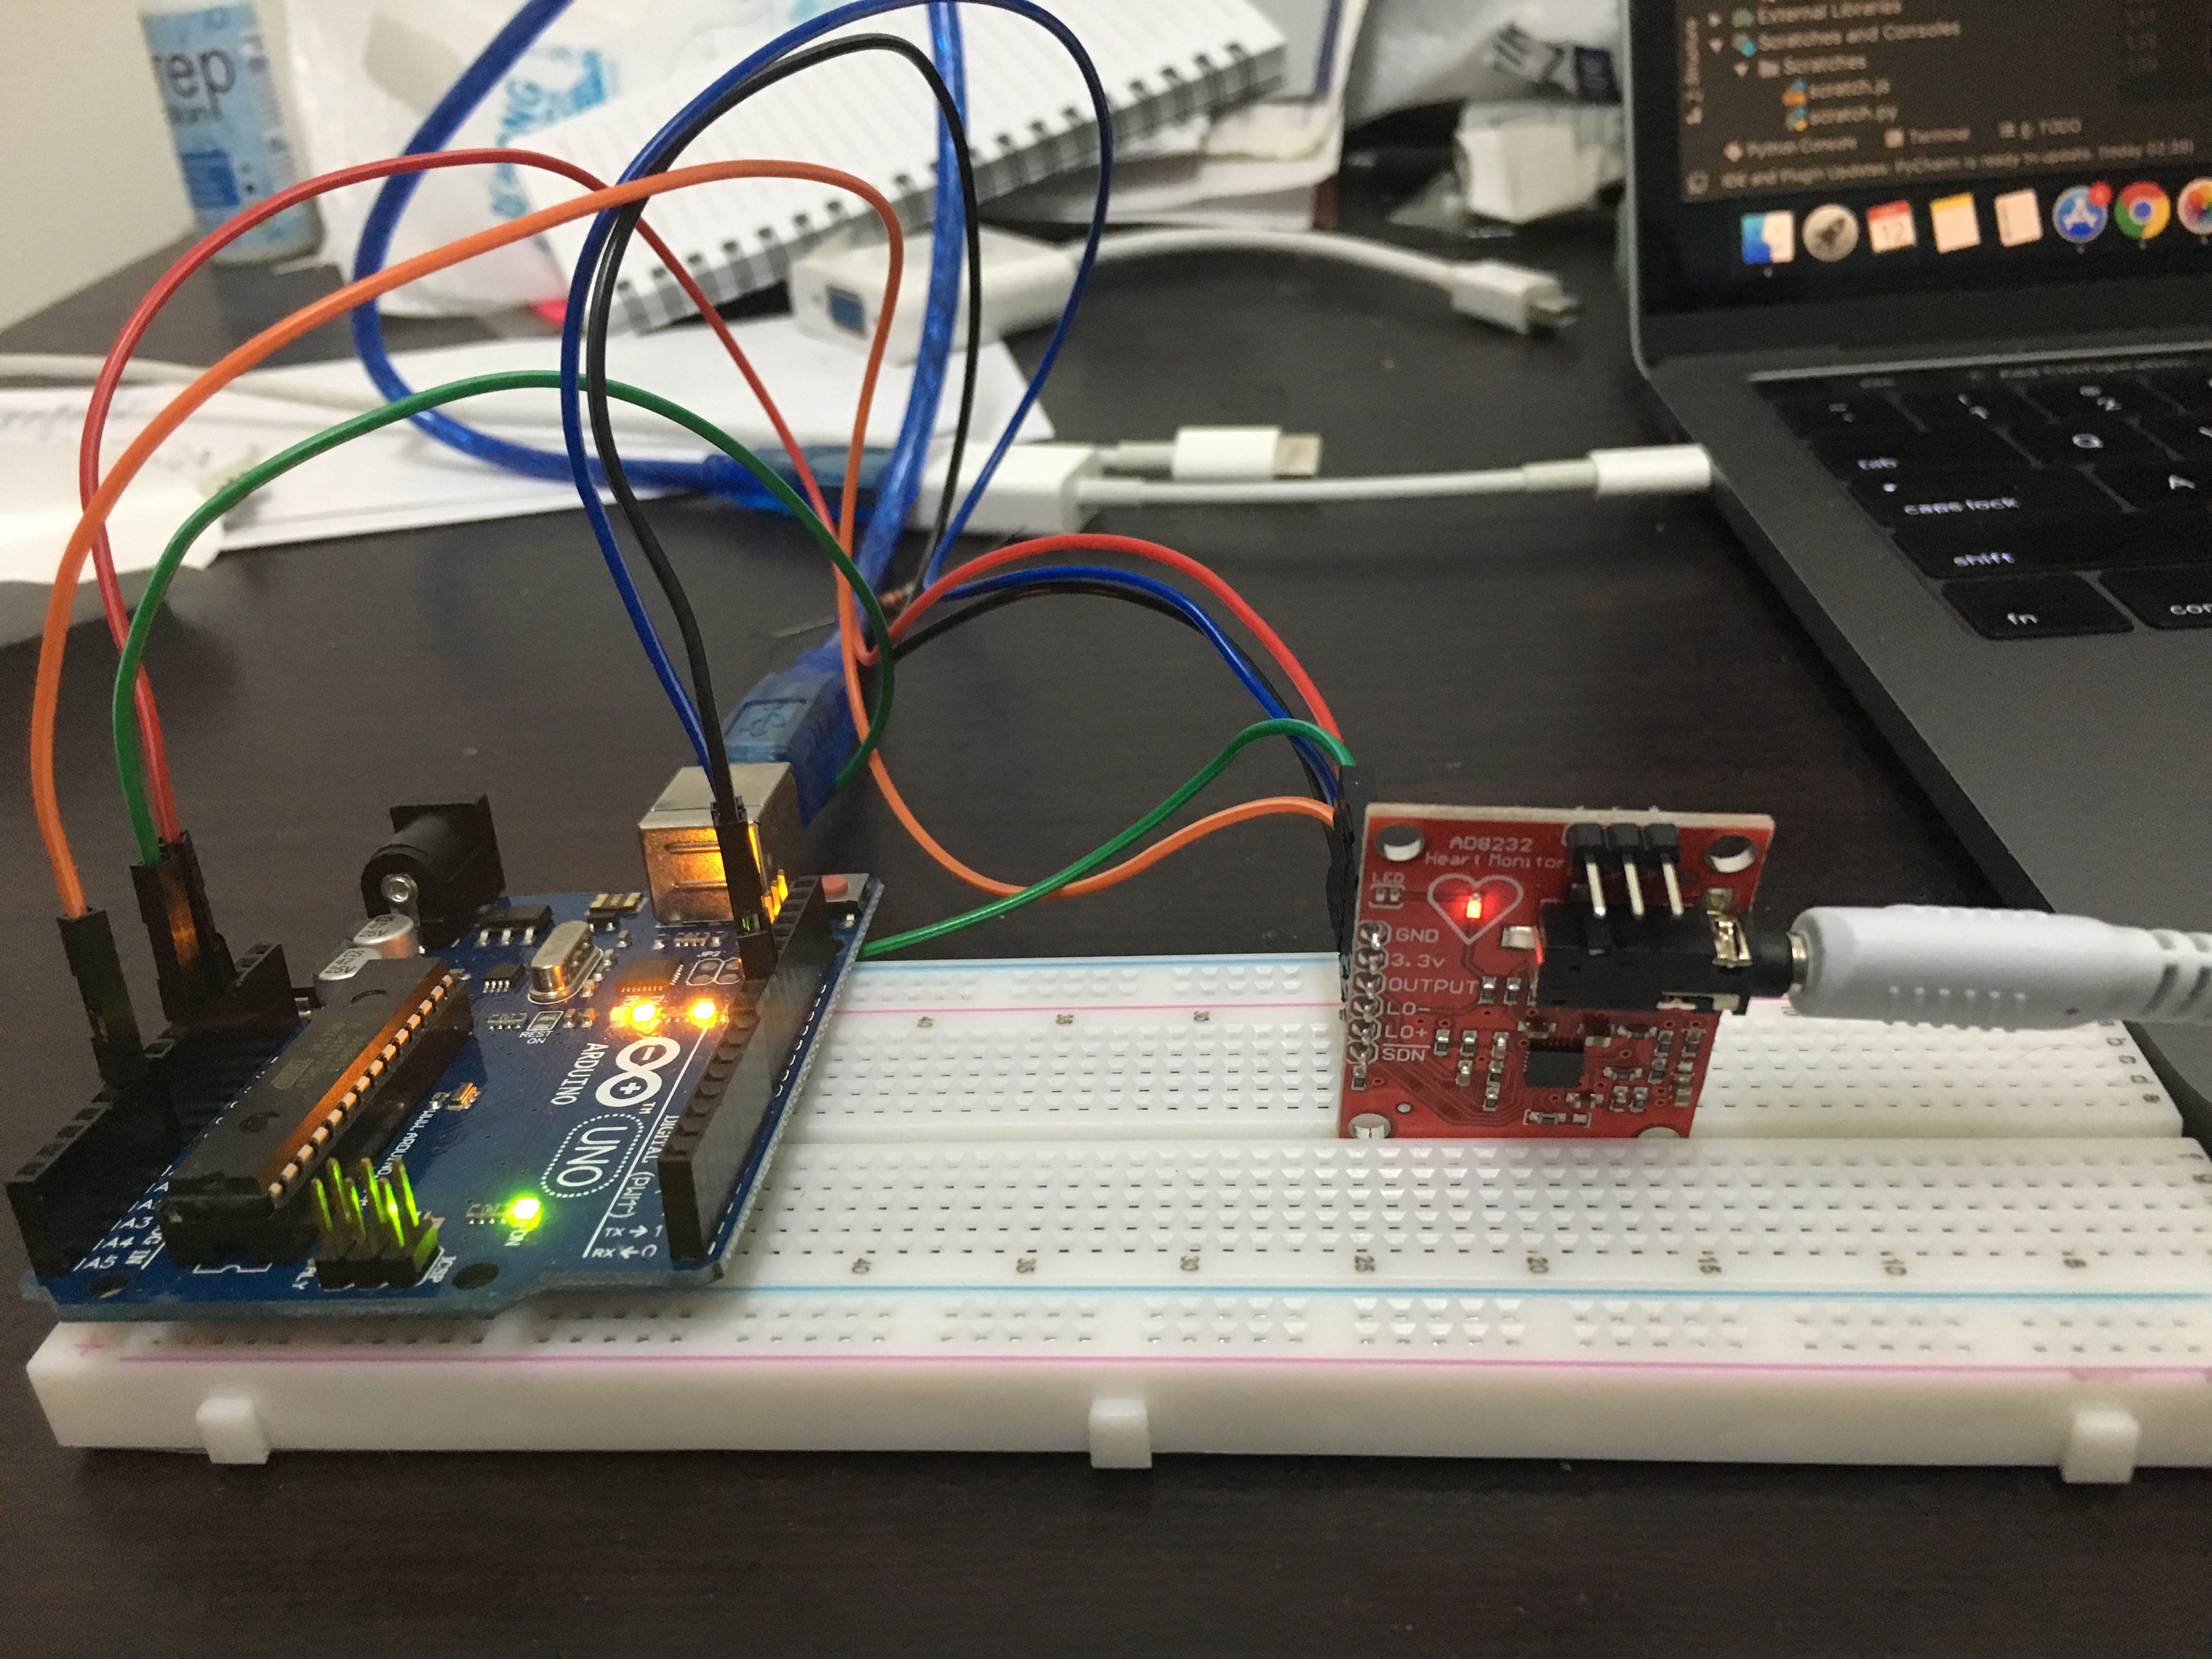

In [2]:
from IPython.display import Image
Image(filename='arduino-circuit.jpg')

In [3]:
##Saving my ECG Recordings into a CSV file as data_rahul.csv


# Visualization (Visualizing my own ECG)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv("data_rahul.csv") #Read data from CSV datafile

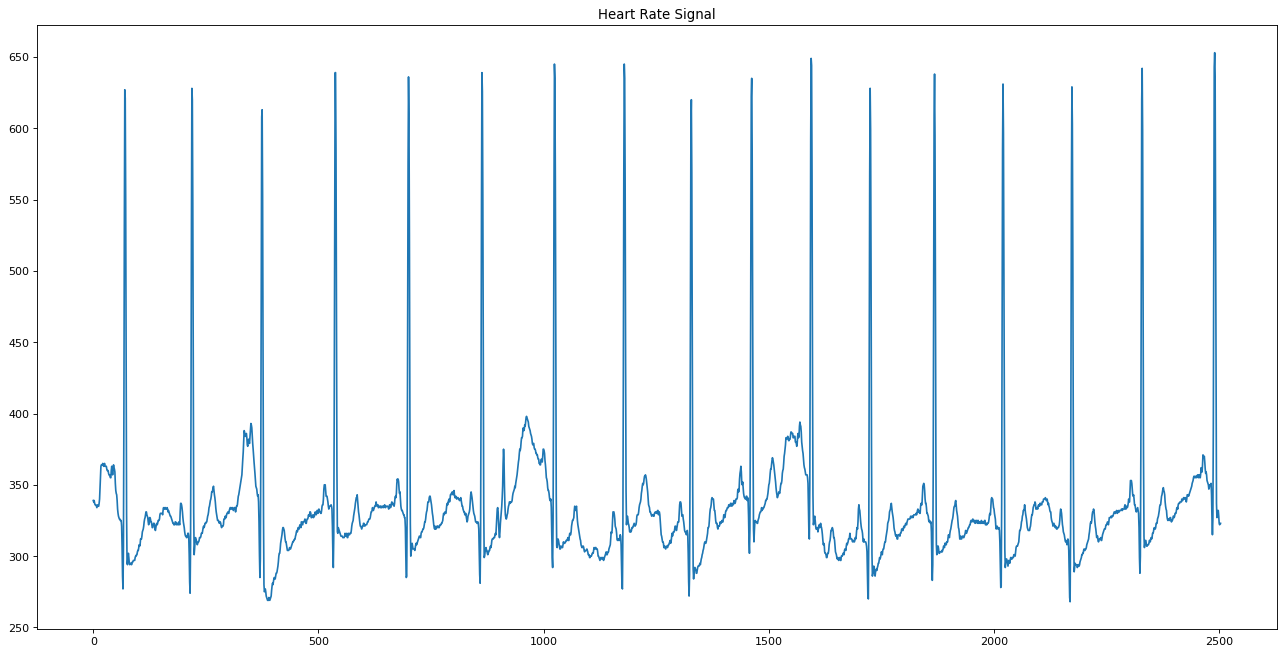

In [6]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

plt.title("Heart Rate Signal") #The title of our plot
plt.plot(dataset.hart) #Draw the plot object

plt.show() #Display the plot

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [8]:
hrw = 0.75 #One-sided window size, as proportion of the sampling frequency
fs = 100 #The example dataset was recorded at 100Hz
mov_avg = dataset['hart'].rolling(int(hrw*fs)).mean() #Calculate moving average
#Impute where moving average function returns NaN, which is the beginning of the signal where x hrw
avg_hr = (np.mean(dataset.hart))
mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
mov_avg = [x*1.2 for x in mov_avg] #For now we raise the average by 20% to prevent the secondary heart contraction from interfering, in part 2 we will do this dynamically
dataset['hart_rollingmean'] = mov_avg #Append the moving average to the dataframe
#Mark regions of interest
window = []
peaklist = []
listpos = 0 #We use a counter to move over the different data columns
for datapoint in dataset.hart:
    rollingmean = dataset.hart_rollingmean[listpos] #Get local mean
    if (datapoint < rollingmean) and (len(window) < 1): #If no detectable R-complex activity -> do nothing
        listpos += 1
    elif (datapoint > rollingmean): #If signal comes above local mean, mark ROI
        window.append(datapoint)
        listpos += 1
    else: #If signal drops below local mean -> determine highest point
        maximum = max(window)
        beatposition = listpos - len(window) + (window.index(max(window))) #Notate the position of the point on the X-axis
        peaklist.append(beatposition) #Add detected peak to list
        window = [] #Clear marked ROI
        listpos += 1
ybeat = [dataset.hart[x] for x in peaklist] #Get the y-value of all peaks for plotting purposes

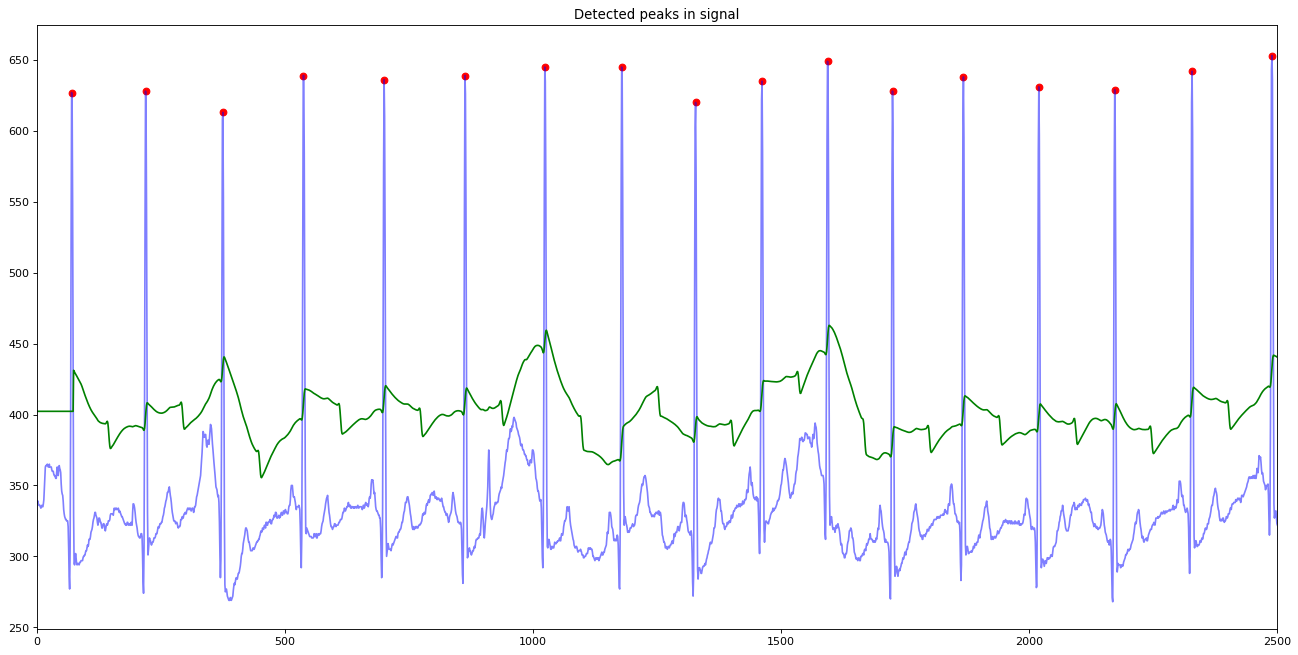

In [9]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

plt.title("Detected peaks in signal")
plt.xlim(0,2500)
plt.plot(dataset.hart, alpha=0.5, color='blue') #Plot semi-transparent HR
plt.plot(mov_avg, color ='green') #Plot moving average
plt.scatter(peaklist, ybeat, color='red') #Plot detected peaks
plt.show()

In [10]:
RR_list = []
cnt = 0
while (cnt < (len(peaklist)-1)):
    RR_interval = (peaklist[cnt+1] - peaklist[cnt]) #Calculate distance between beats in # of samples
    #print(RR_interval)
    ms_dist = ((RR_interval / fs) * 1000.0) #Convert sample distances to ms distances
    RR_list.append(ms_dist) #Append to list
    cnt += 1
#print(RR_list)
print("Mean RR-Peak Interval : "+str(np.mean(RR_list)))
bpm = 120000 / np.mean(RR_list)#60000 ms (1 minute) / average R-R interval of signal

print("Average Heart Beat is: %.01f" %bpm) #Round off to 1 decimal and print

Mean RR-Peak Interval : 1512.5
Average Heart Beat is: 79.3


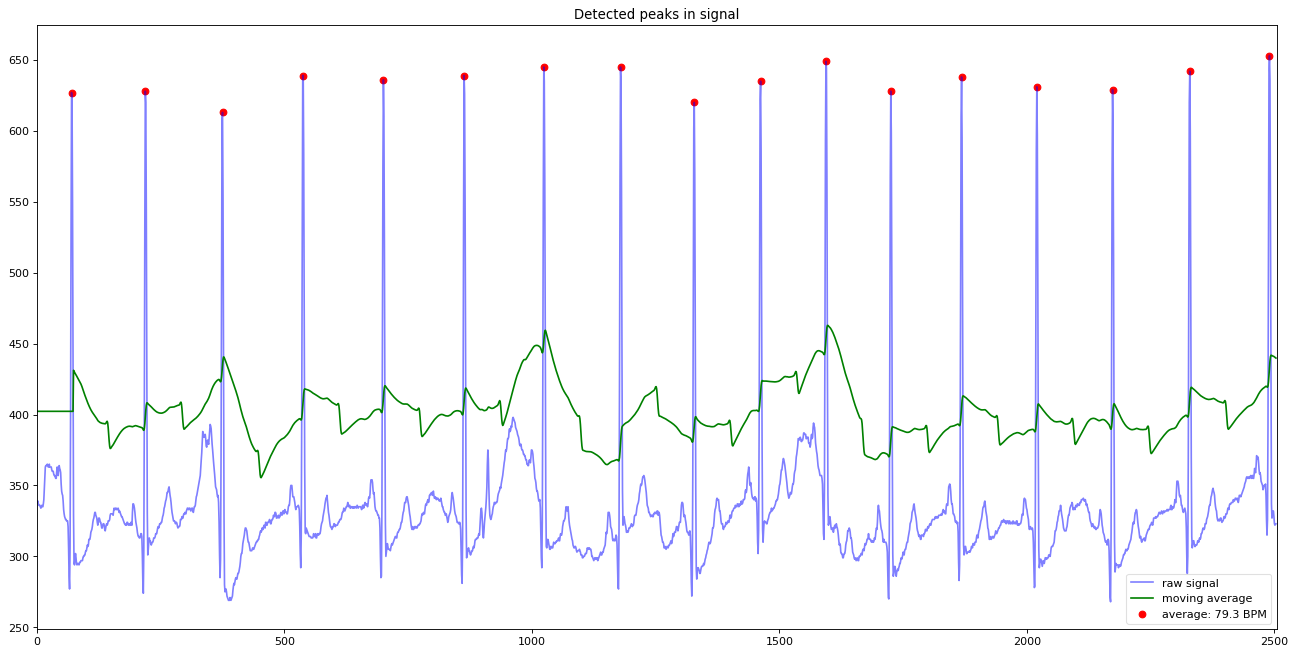

In [11]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

plt.title("Detected peaks in signal")
plt.xlim(0,2505)
plt.plot(dataset.hart, alpha=0.5, color='blue', label="raw signal") #Plot semi-transparent HR
plt.plot(mov_avg, color ='green', label="moving average") #Plot moving average
plt.scatter(peaklist, ybeat, color='red', label="average: %.1f BPM" %bpm) #Plot detected peaks
plt.legend(loc=4, framealpha=0.6)

plt.show()

# Analysis

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("proper.csv")

In [14]:
df.head()

,Age,Sex,Height,Weight,BPM,RR-Int,Arythmia
0,56,1,165,64,53,1132.075472,1
1,54,0,172,95,75,800.000000,0
2,55,0,175,94,71,845.070422,0
3,75,0,190,80,63,952.380952,0
4,13,0,169,51,84,714.285714,0


In [15]:
import matplotlib.pyplot as plt


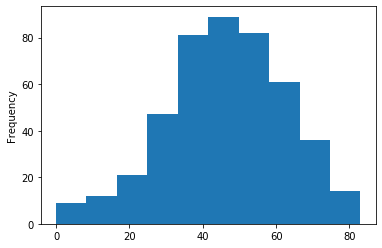

In [16]:
df['Age'].plot.hist()

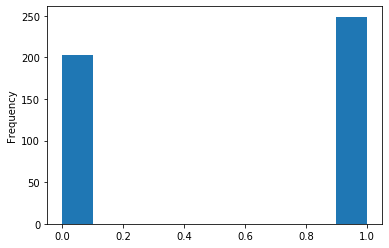

In [17]:
df['Sex'].plot.hist()

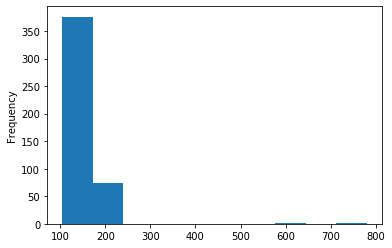

In [18]:
df['Height'].plot.hist()

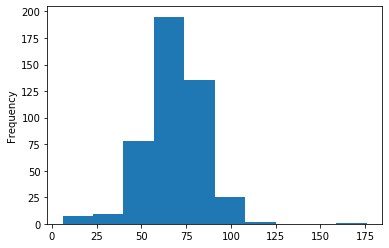

In [19]:
df['Weight'].plot.hist()

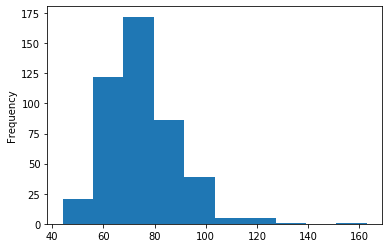

In [20]:
df['BPM'].plot.hist()

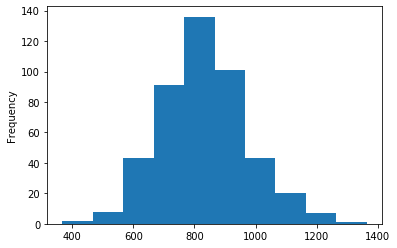

In [21]:
df['RR-Int'].plot.hist()

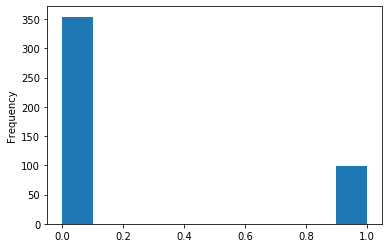

In [22]:
df['Arythmia'].plot.hist()

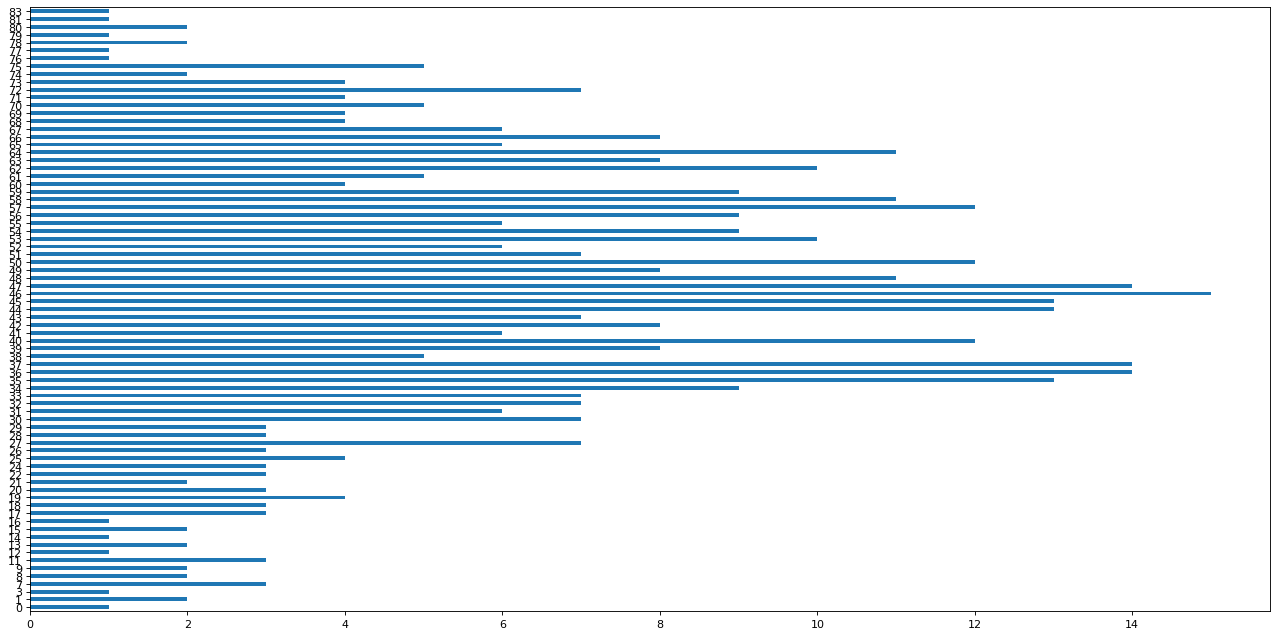

In [23]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
df['Age'].value_counts().sort_index().plot.barh()

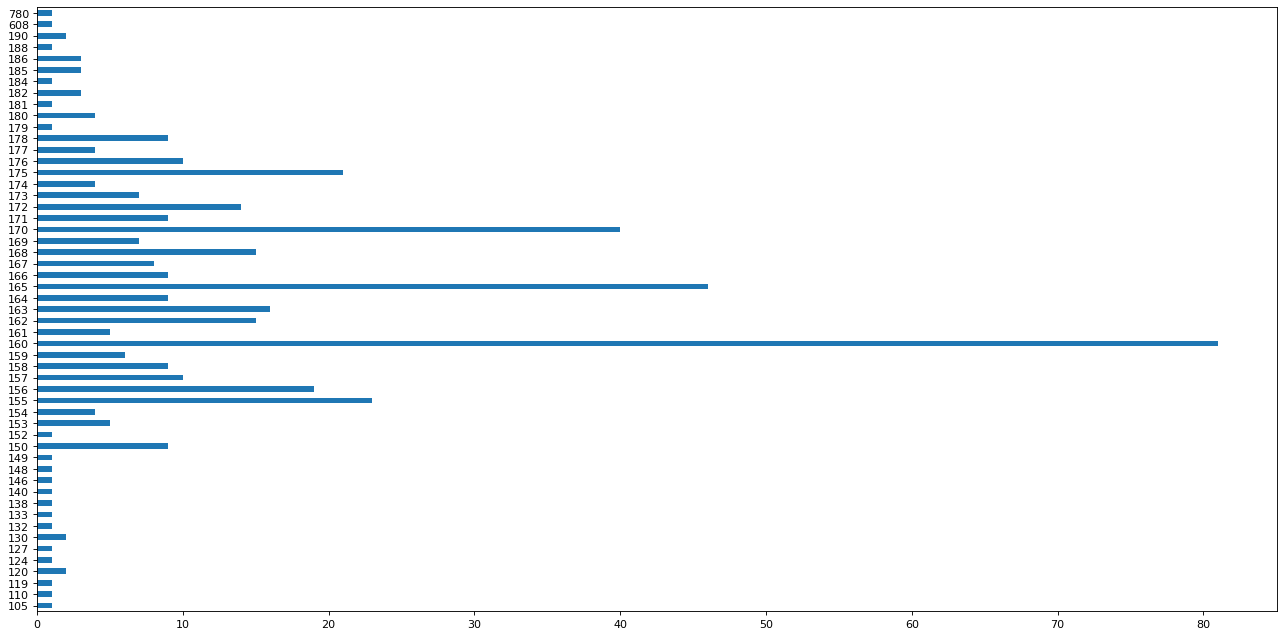

In [24]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
df['Height'].value_counts().sort_index().plot.barh()

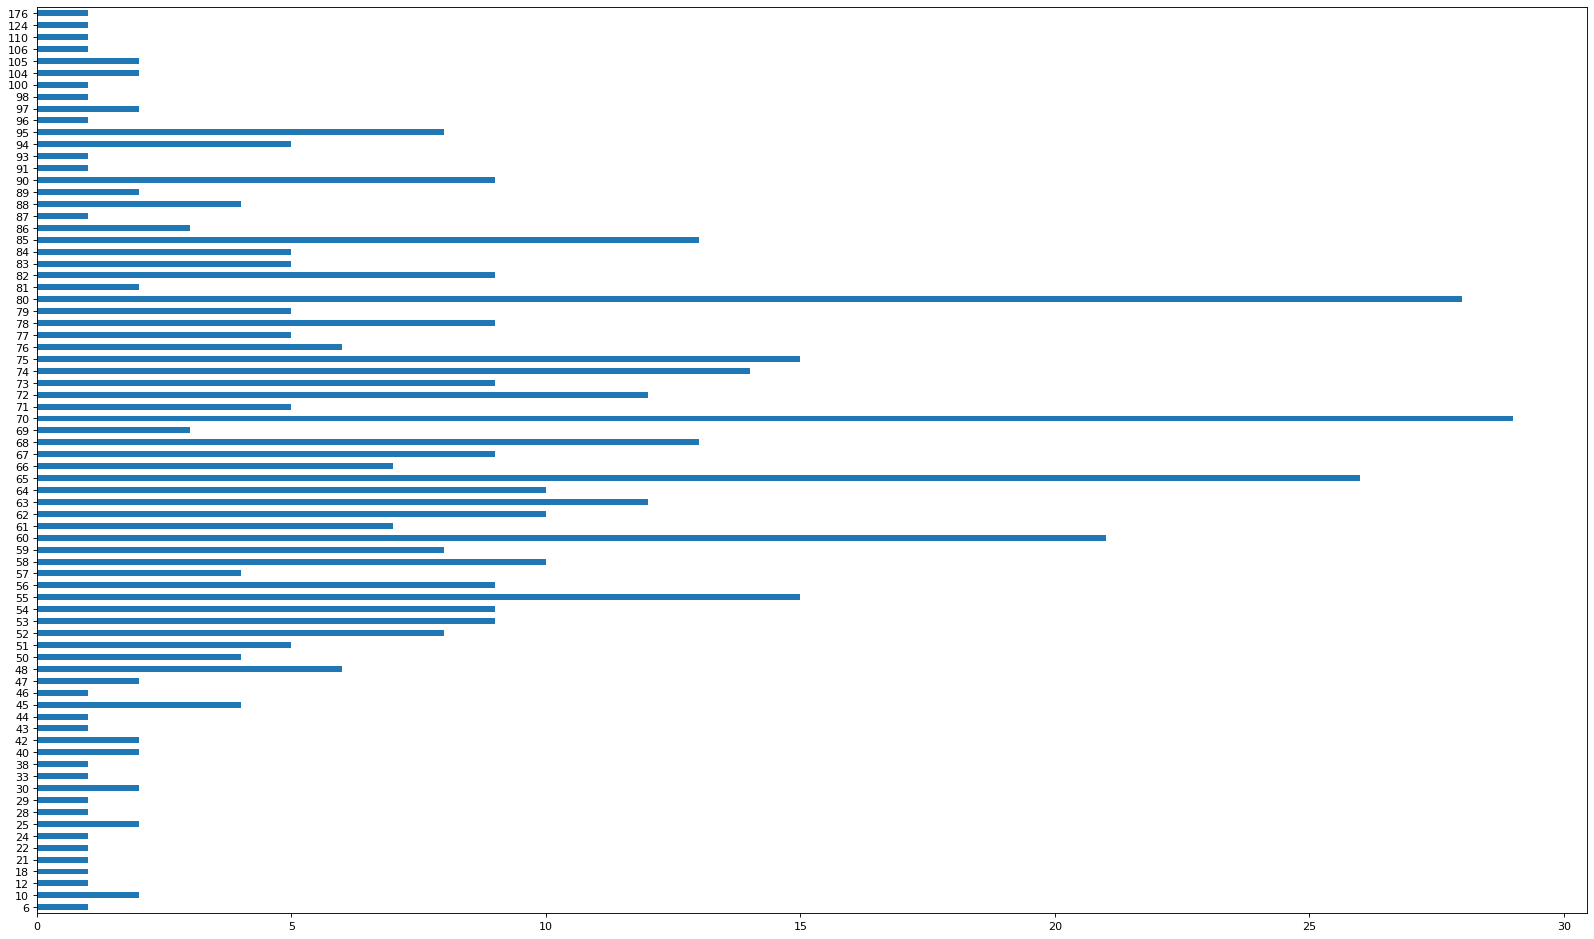

In [25]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 15), dpi=80, facecolor='w', edgecolor='k')
df['Weight'].value_counts().sort_index().plot.barh()

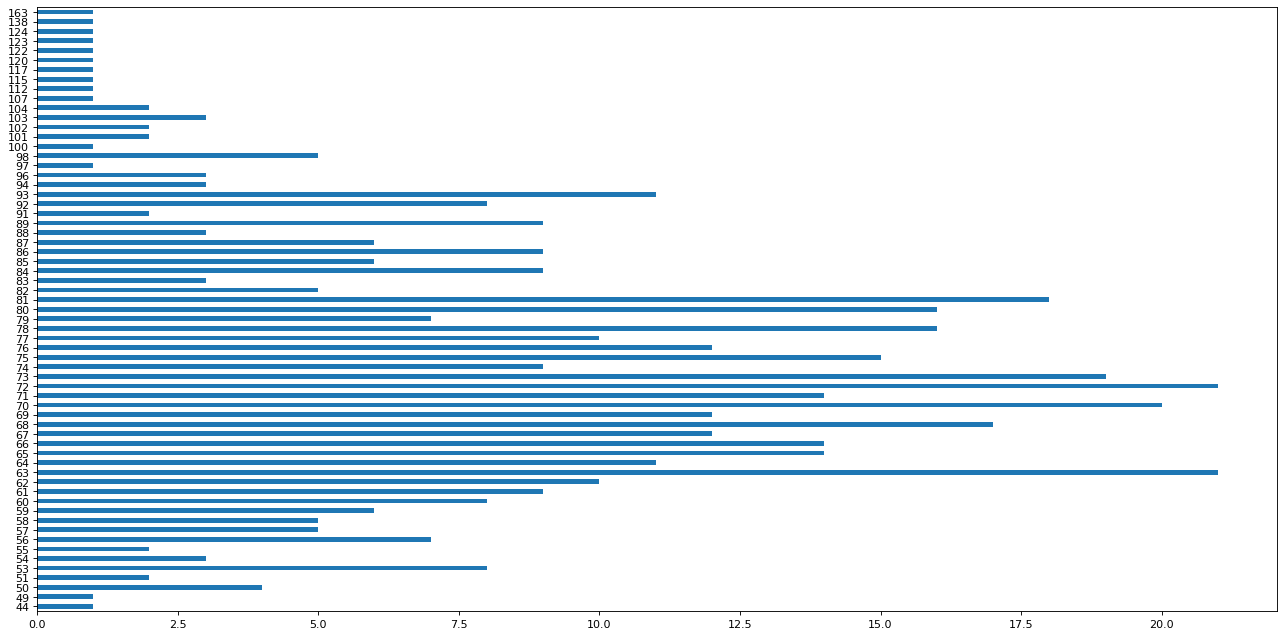

In [26]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
df['BPM'].value_counts().sort_index().plot.barh()

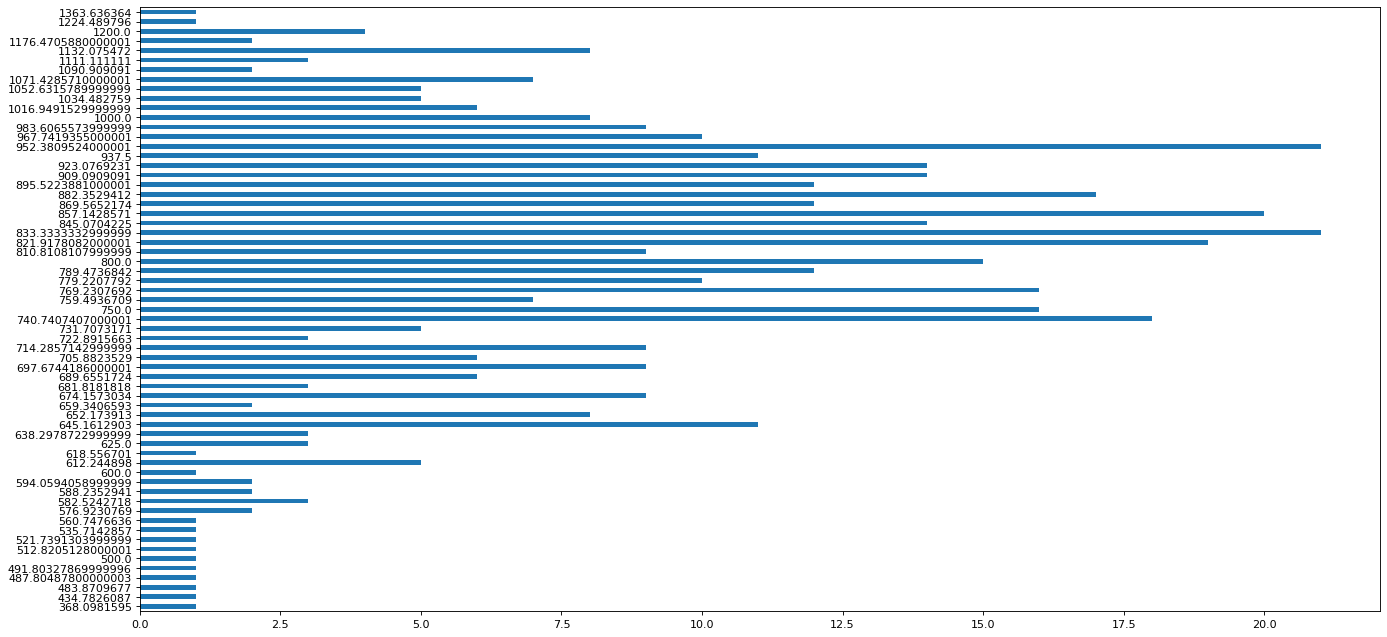

In [27]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
df['RR-Int'].value_counts().sort_index().plot.barh()

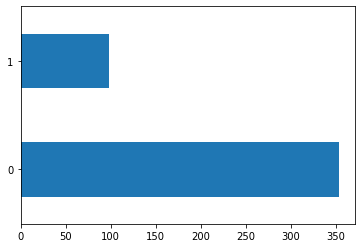

In [28]:

df['Arythmia'].value_counts().sort_index().plot.barh()

In [29]:
import seaborn as sns

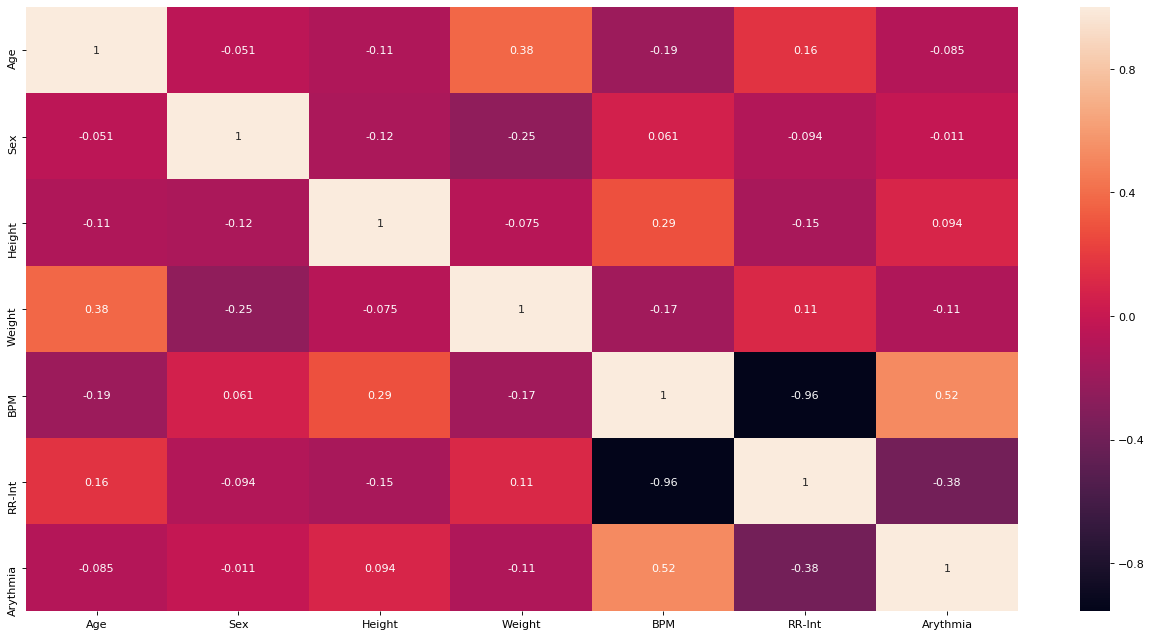

In [30]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df.corr(), annot=True)

<Figure size 1600x800 with 0 Axes>

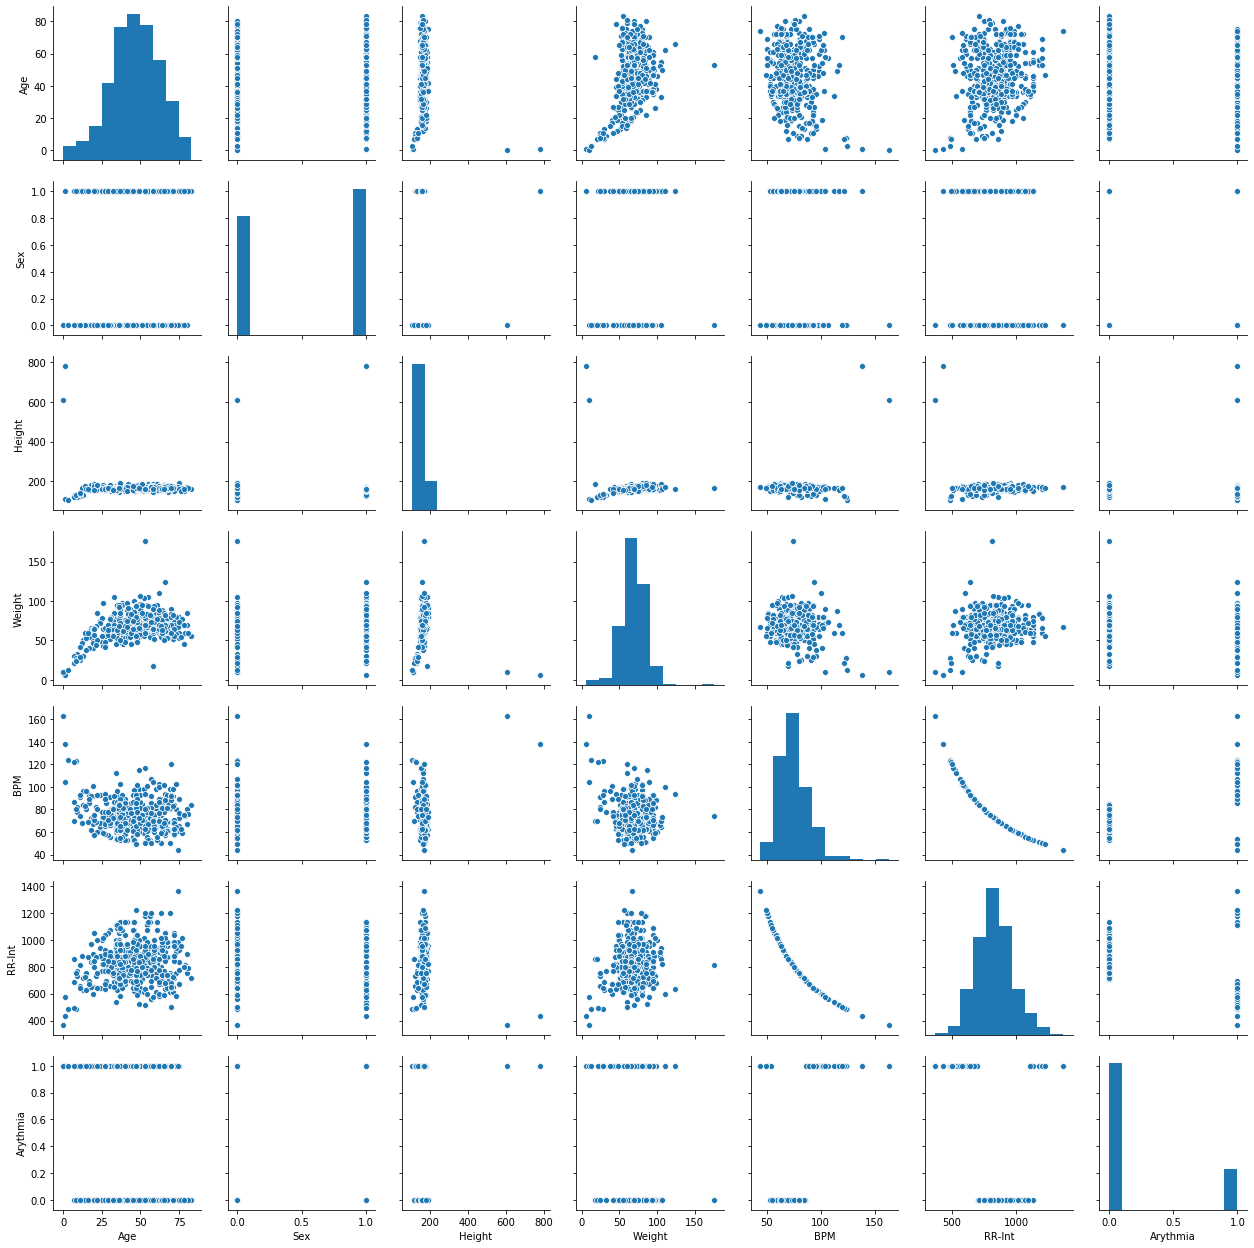

In [31]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.pairplot(df)

In [137]:
X = df[['Age', 'Sex', 'Height', 'Weight', 'BPM', 'RR-Int']]
y = df[['Arythmia']]

In [138]:
X

,Age,Sex,Height,Weight,BPM,RR-Int
0,56,1,165,64,53,1132.075472
1,54,0,172,95,75,800.000000
2,55,0,175,94,71,845.070422
3,75,0,190,80,63,952.380952
4,13,0,169,51,84,714.285714
5,40,1,160,52,70,857.142857
6,49,1,162,54,67,895.522388
7,44,0,168,56,64,937.500000
8,50,1,167,67,63,952.380952
9,62,0,170,72,70,857.142857


In [139]:
y

,Arythmia
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [169]:
from sklearn.model_selection import train_test_split

In [170]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [172]:
len(X_train)

361

In [173]:
len(X_test)

91

In [174]:
X_train

,Age,Sex,Height,Weight,BPM,RR-Int
257,48,0,178,80,102,588.235294
199,70,1,160,90,89,674.157303
267,43,0,163,85,68,882.352941
265,58,1,160,62,72,833.333333
103,36,1,160,65,57,1052.631579
105,46,0,165,55,63,952.380952
20,45,0,169,67,66,909.090909
118,58,1,170,75,70,857.142857
226,43,0,172,90,81,740.740741
402,7,1,127,22,122,491.803279


In [175]:
X_test

,Age,Sex,Height,Weight,BPM,RR-Int
67,45,1,150,71,56,1071.428571
225,37,0,168,82,56,1071.428571
403,62,1,165,70,77,779.220779
365,43,0,165,80,80,750.000000
241,46,0,177,85,63,952.380952
202,35,1,160,51,73,821.917808
114,39,1,160,45,65,923.076923
130,48,1,165,70,61,983.606557
70,37,0,182,90,69,869.565217
289,60,1,158,75,76,789.473684


# Decision Tree

In [176]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()

In [177]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [178]:
pred = dt_clf.predict(X_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0
 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0]


In [179]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
print("Result:\n================================================")



report_dt=classification_report(y_test,pred)
print(report_dt)

print("================================================")


print("Accuracy :")        
print(accuracy_score(pred, y_test)*100)
print("Precision :")
print(precision_score(pred, y_test)*100)
print("Recall :")
print(recall_score(pred, y_test)*100)
print("f1_score :")
print(f1_score(pred, y_test)*100)
print("Confusion Matrix :")
print(confusion_matrix(pred, y_test))

Result:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.94      1.00      0.97        17

    accuracy                           0.99        91
   macro avg       0.97      0.99      0.98        91
weighted avg       0.99      0.99      0.99        91

Accuracy :
98.9010989010989
Precision :
100.0
Recall :
94.44444444444444
f1_score :
97.14285714285714
Confusion Matrix :
[[73  0]
 [ 1 17]]


In [180]:
test_score = accuracy_score(y_test, dt_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, dt_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Decision Tree", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree,100.0,98.901099


# K Nearest Neighbour classifier

In [181]:


from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [182]:
pred = knn_classifier.predict(X_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0
 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0]


In [183]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
print("Results:\n================================================")


report_knn=classification_report(y_test,pred)
print(report_knn)

print("================================================")


print("Accuracy :")        
print(accuracy_score(pred, y_test)*100)
print("Precision :")
print(precision_score(pred, y_test)*100)
print("Recall :")
print(recall_score(pred, y_test)*100)
print("f1_score :")
print(f1_score(pred, y_test)*100)
print("Confusion Matrix :")
print(confusion_matrix(pred, y_test))

Results:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.94      1.00      0.97        17

    accuracy                           0.99        91
   macro avg       0.97      0.99      0.98        91
weighted avg       0.99      0.99      0.99        91

Accuracy :
98.9010989010989
Precision :
100.0
Recall :
94.44444444444444
f1_score :
97.14285714285714
Confusion Matrix :
[[73  0]
 [ 1 17]]


In [184]:
test_score = accuracy_score(y_test, knn_classifier.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_classifier.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree,100.000000,98.901099
1,K-nearest neighbors,99.722992,98.901099


# Support Vector Machine

In [185]:
from sklearn import svm

In [186]:
a_svm=svm.SVC(gamma='scale')
a_svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [187]:
pred = a_svm.predict(X_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


In [188]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
print("Results:\n================================================")

report_svm=classification_report(y_test,pred)
print(report_svm)

print("================================================")


print("Accuracy :")        
print(accuracy_score(pred, y_test)*100)
print("Precision :")
print(precision_score(pred, y_test)*100)
print("Recall :")
print(recall_score(pred, y_test)*100)
print("f1_score :")
print(f1_score(pred, y_test)*100)
print("Confusion Matrix :")
print(confusion_matrix(pred, y_test))

Results:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        74
           1       1.00      0.71      0.83        17

    accuracy                           0.95        91
   macro avg       0.97      0.85      0.90        91
weighted avg       0.95      0.95      0.94        91

Accuracy :
94.5054945054945
Precision :
70.58823529411765
Recall :
100.0
f1_score :
82.75862068965517
Confusion Matrix :
[[74  5]
 [ 0 12]]


In [189]:
test_score = accuracy_score(y_test, a_svm.predict(X_test)) * 100
train_score = accuracy_score(y_train, a_svm.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree,100.000000,98.901099
1,K-nearest neighbors,99.722992,98.901099
2,Support Vector Machine,91.135734,94.505495


# Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression

In [191]:
a_lr=LogisticRegression()
a_lr.fit(X_train,y_train)
pred=a_lr.predict(X_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [192]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
print("Results:\n================================================")

report_lr=classification_report(y_test,pred)
print(report_lr)

print("================================================")



print("Accuracy :")        
print(accuracy_score(pred, y_test)*100)
print("Precision :")
print(precision_score(pred, y_test)*100)
print("Recall :")
print(recall_score(pred, y_test)*100)
print("f1_score :")
print(f1_score(pred, y_test)*100)
print("Confusion Matrix :")
print(confusion_matrix(pred, y_test))

Results:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        74
           1       1.00      0.47      0.64        17

    accuracy                           0.90        91
   macro avg       0.95      0.74      0.79        91
weighted avg       0.91      0.90      0.89        91

Accuracy :
90.10989010989012
Precision :
47.05882352941176
Recall :
100.0
f1_score :
63.99999999999999
Confusion Matrix :
[[74  9]
 [ 0  8]]


In [193]:
test_score = accuracy_score(y_test, a_lr.predict(X_test)) * 100
train_score = accuracy_score(y_train, a_lr.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree,100.000000,98.901099
1,K-nearest neighbors,99.722992,98.901099
2,Support Vector Machine,91.135734,94.505495
3,Logistic Regression,88.642659,90.109890


# Naive Bayes

In [194]:
from sklearn.naive_bayes import GaussianNB

In [195]:


#Naive Bayes
a_nb=GaussianNB()
a_nb.fit(X_train,y_train)
pred=a_nb.predict(X_test)

In [196]:
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


In [197]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
print("Results:\n================================================")

report_nb=classification_report(y_test,pred)
print(report_nb)

print("================================================")


print("Accuracy :")        
print(accuracy_score(pred, y_test)*100)
print("Precision :")
print(precision_score(pred, y_test)*100)
print("Recall :")
print(recall_score(pred, y_test)*100)
print("f1_score :")
print(f1_score(pred, y_test)*100)
print("Confusion Matrix :")
print(confusion_matrix(pred, y_test))

Results:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        74
           1       1.00      0.71      0.83        17

    accuracy                           0.95        91
   macro avg       0.97      0.85      0.90        91
weighted avg       0.95      0.95      0.94        91

Accuracy :
94.5054945054945
Precision :
70.58823529411765
Recall :
100.0
f1_score :
82.75862068965517
Confusion Matrix :
[[74  5]
 [ 0 12]]


In [198]:
test_score = accuracy_score(y_test, a_nb.predict(X_test)) * 100
train_score = accuracy_score(y_train, a_nb.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Naive Bayes", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree,100.000000,98.901099
1,K-nearest neighbors,99.722992,98.901099
2,Support Vector Machine,91.135734,94.505495
3,Logistic Regression,88.642659,90.109890
4,Naive Bayes,91.135734,94.505495


# Random Forest

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
a_rf=RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None,min_samples_leaf=30)
a_rf.fit(X_train,y_train)
pred=a_rf.predict(X_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


In [201]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
print("Results:\n================================================")

report_rf=classification_report(y_test,pred)
print(report_rf)

print("================================================")


print("Accuracy :")        
print(accuracy_score(pred, y_test)*100)
print("Precision :")
print(precision_score(pred, y_test)*100)
print("Recall :")
print(recall_score(pred, y_test)*100)
print("f1_score :")
print(f1_score(pred, y_test)*100)
print("Confusion Matrix :")
print(confusion_matrix(pred, y_test))

Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.88      0.94        17

    accuracy                           0.98        91
   macro avg       0.99      0.94      0.96        91
weighted avg       0.98      0.98      0.98        91

Accuracy :
97.8021978021978
Precision :
88.23529411764706
Recall :
100.0
f1_score :
93.75
Confusion Matrix :
[[74  2]
 [ 0 15]]


In [202]:
test_score = accuracy_score(y_test, a_rf.predict(X_test)) * 100
train_score = accuracy_score(y_train, a_rf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree,100.000000,98.901099
1,K-nearest neighbors,99.722992,98.901099
2,Support Vector Machine,91.135734,94.505495
3,Logistic Regression,88.642659,90.109890
4,Naive Bayes,91.135734,94.505495
5,Random Forest,95.567867,97.802198
